In [11]:
import pandas as pd
import yfinance as yf
from fredapi import Fred
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot with a black background
plt.figure(figsize=(10, 8))
plt.style.use('dark_background')

# FRED API key
fred = Fred(api_key='Enter Your Key')

# Define FRED indicators (excluding GDP)
indicators = {
    'CPI': 'CPIAUCSL',  # Consumer Price Index
    'Unemployment Rate': 'UNRATE',  # Unemployment Rate
    'Tech Employment': 'CES5051100001',  # Information Sector Employment
    'SP 500': 'SP500'  # NASDAQ Composite Index
    
}

# Define date range
start_date = datetime.datetime.now() - datetime.timedelta(days=18 * 30)  # approximately 18 months
end_date = datetime.datetime.now()

# Pull FRED data and combine into a single DataFrame
fred_data_frames = []
for name, code in indicators.items():
    data = fred.get_series(code, start_date, end_date)
    data = data.rename(name)
    fred_data_frames.append(data)

fred_df = pd.concat(fred_data_frames, axis=1)

# Pull XLK data from yfinance, resample to first trading day of each month
xlk = yf.download('XLK', start=start_date, end=end_date)['Adj Close']
xlk_monthly = xlk.resample('MS').first()  # MS is start of the month

# Combine FRED data and XLK data, and drop NaNs
combined_df = pd.concat([fred_df, xlk_monthly.rename('XLK')], axis=1).dropna()

# Display the combined DataFrame
combined_df.head()

[*********************100%***********************]  1 of 1 completed


,CPI,Unemployment Rate,Tech Employment,SP 500,XLK
2023-06-01,304.003,3.6,950.1,4221.02,164.031616
2023-08-01,306.187,3.8,936.3,4576.73,176.954666
2023-09-01,307.288,3.8,955.0,4515.77,174.527924
2023-11-01,308.024,3.7,933.0,4237.86,165.947220
2023-12-01,308.742,3.7,931.7,4594.63,184.211548


<Figure size 1000x800 with 0 Axes>

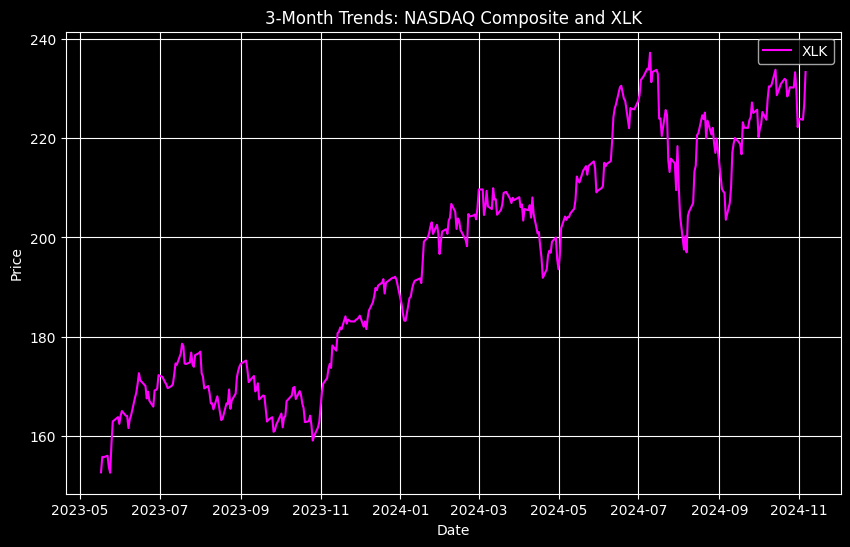

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(xlk.index, xlk.values, label='XLK', color='magenta')
plt.title("3-Month Trends: NASDAQ Composite and XLK")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Correlation Table:


,CPI,Unemployment Rate,Tech Employment,SP 500,XLK
CPI,1.00,0.80,-0.80,0.92,0.89
Unemployment Rate,0.80,1.00,-0.71,0.87,0.83
Tech Employment,-0.80,-0.71,1.00,-0.74,-0.75
SP 500,0.92,0.87,-0.74,1.00,0.97
XLK,0.89,0.83,-0.75,0.97,1.00


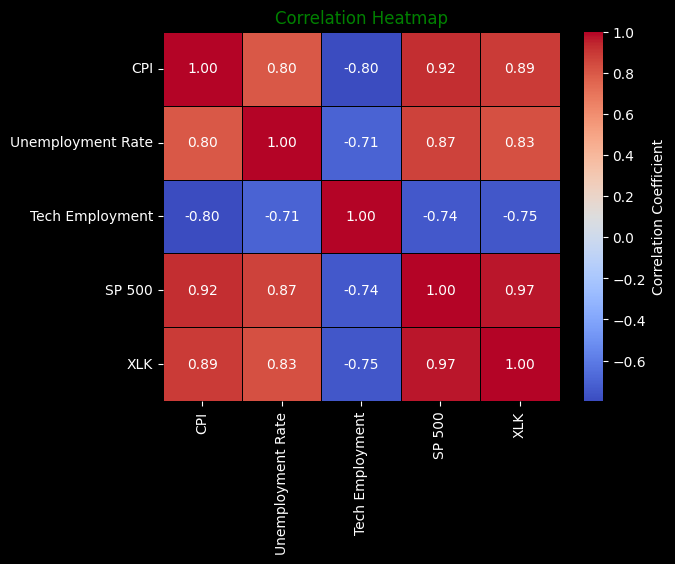

In [13]:
# Calculate correlation matrix
correlation_matrix = combined_df.corr()

# Display styled correlation table
print("Correlation Table:")
styled_corr = correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)
display(styled_corr)  # This is for Jupyter Notebook; remove if not applicable



# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            cbar_kws={'label': 'Correlation Coefficient'}, 
            annot_kws={"color": "white"},   # annotation text color
            linecolor='black', linewidths=0.5)  # adds a grid for readability

plt.title('Correlation Heatmap', color='green')
plt.show()